# Lab 4. Probabilistic Inference
This lab sheet aims to help us understand more about Probabilistic Inference, as we are going to study different probabilistic inference models and even solve 3 problems, which will be divided into the following tasks:
1. The iris classification problem
2. The diabetes diagnosis problem
3. The monty hall problem

Each one of these will be solved using the Naïve Bayes and Bayesian Networks.

## Task 4.1 Iris Classification Using Naïve Bayes
###Problem Description

This first task presents us with a flower classification problem, in which we will analyse the petal and sepal features of the flowers, in order to predict their species. For this, we will use a dataset that contains 5 attributes, such as four features of the flowers (sepal length, sepal width, petal length and petal width) and the iris species (three only). This dataset has a total number of 150 data samples of which 50 correspond for each species (we have 3 species).

We can see these species of flower in the figure below.

![Figure 1](https://github.com/LeomPina/AIreports/blob/main/Captura%20de%20ecr%C3%A3%202023-10-15%20232934.png?raw=true)

Figure 1

##Implementation and results
This section shows the implemented code and its respective output.


In [ ]:
!pip install scikit-learn
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches


In [ ]:
# We only use two features (sepal and petaal length)
iris = datasets.load_iris()
X = iris.data
#X = iris.data[:, [0,2]]
Y = iris.target

# split the dataset into training (80%) and testing (20%), and fit the data into the naive Bayes model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Use the naive Bayes model we just built to predict on the testing set, and display the results.
Y_pred = nb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Prior:\n", nb.class_prior_)
print("Mean:\n", nb.theta_)
print("Variance:\n", nb.var_)


Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Prior:
 [0.33333333 0.34166667 0.325     ]
Mean:
 [[4.9825     3.3875     1.46       0.2375    ]
 [5.97073171 2.7804878  4.27560976 1.31707317]
 [6.55641026 3.00512821 5.53333333 2.02307692]]
Variance:
 [[0.12194375 0.14109375 0.0334     0.01134375]
 [0.27572874 0.09913147 0.20964902 0.03702558]
 [0.43784353 0.10869165 0.29606838 0.08228797]]


<ipython-input-45-3b7d37fb0ffd>:11: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(error_data[:,0], error_data[:,1], marker='x', facecolors='r', edgecolors='r', s=64)


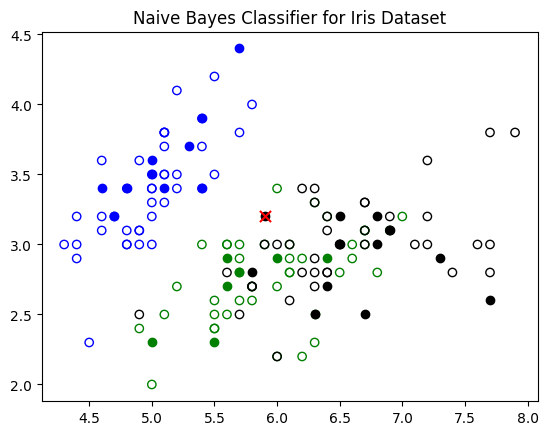

In [ ]:
colours = 'bgk'
for i, colour in enumerate(colours):
  train_data = X_train[Y_train == i]
  plt.scatter(train_data[:,0], train_data[:,1], marker='o', facecolors='none', edgecolors=colour)
  #plt.scatter(train_data[:,2], train_data[:,3], marker='o', facecolors='none', edgecolors=colour)
  test_data = X_test[Y_pred == i]
  plt.scatter(test_data[:,0], test_data[:,1], marker='o', facecolors=colour, edgecolors=colour)
  #plt.scatter(test_data[:,2], test_data[:,3], marker='o', facecolors=colour, edgecolors=colour)

error_data = X_test[Y_pred != Y_test]
plt.scatter(error_data[:,0], error_data[:,1], marker='x', facecolors='r', edgecolors='r', s=64)
#plt.scatter(error_data[:,2], error_data[:,3], marker='x', facecolors='r', edgecolors='r', s=64)

# ellipse = patches.Ellipse(xy=nb.theta_[0], width=nb.sigma_[0][0]*10, height=nb.sigma_[0][1]*10, edgecolor='b', fc='none')
# # ellipse = patches.Ellipse(xy=(5,2), width=2, height=1)
# ax = plt.gca()
# ax.add_patch(ellipse)

plt.title("Naive Bayes Classifier for Iris Dataset")
plt.show()

## Discussions
To solve this problem, the sklearn or scikit-learn package was used, as it is a popular machine learning library and provides lots of important tools that were useful in this lab, such as the Bayesian inference methods and lots of machine learning algorithms necessary to this study. The online
documentation can be found at https://scikit-learn.org/stable/user_guide.html.

For this first case, instead of using all four features, we only used two, sepal length and petal length, in order to simplify the problem and its results.

The following table presents us the results (an example) outputted by the program, when using the naive Bayes model:

| accuracy | Confusion Matrix| Prior | Mean | Variance |
|:-----------|:--------|:--------|:--------|:--------|
|    0.8667     |    [ [ 7  0  0] [ 0  9  2] [ 0  2  10] ] | [0.3583 0.3250 0.3167] | [ [5.0465 1.4790] [5.9435 4.2871] [6.6184 5.5657] ] | [ [0.1099 0.0295] [0.2050 0.1826] [0.4420 0.3306] ] |

###### table 1

Notice that each run can give different results as  the dataset is randomly split into the training and testing sets.

By analysing the previous table, we can see that the ratio of correctly predicted instances to the total ones in the testing set, or in other words, how accurate was the model used in predicting the species based on the two features was approximately 0.8667 (which is a good result). Furthermore, The confusion matrix indicates the performance of the model, the prior shows us the probability of each species occurring in the sample before observing any features, the mean presents the average value of each feature for each species and we can also see the variance of each feature for each species.

In the figure below, we can see a plot relative to the example results displayed in the table above.

![Figure 2](https://github.com/LeomPina/AIreports/blob/main/NB_plot.png?raw=true)

Figure 2

By looking at the plot, we can see the distributed data sample. Three different colours were used for representing the species, red crosses for the misclassified patterns, solid markers for the testing set, and empty ones for the training set. It's important to notice that, as two of the three existing species are not clearly separable in the dataset, we can see four values cross-marked, which occurred around the limit of these two classes.

For this second case, we will now use the four features available.

The table below shows us the results outputted for the full iris dataset:

| accuracy | Confusion Matrix| Prior | Mean | Variance |
|:-----------|:--------|:--------|:--------|:--------|
|    0.9667     |    [ [ 5  0  0] [ 0  11  0] [ 0  1  13] ] | [0.3750 0.3250 0.3000  ] | [ [5.0333 3.4466 1.4688 0.2533] [5.9589 2.7769 4.2820 1.3461] [6.5444 2.9527 5.5416 2.0527] ] | [ [0.1222 0.1496 0.0310  0.0113] [0.2813 0.1094 0.2301 0.0419] [0.4402 0.1052 0.3118 0.0813] ] |

###### table 2

By analysing the previous table, we can notice that the accuracy was higher this time, which means the results show a better level of prediction, some possible reasons for this to happen are, for example, the addition of features that may be more relevant for distinguishing the iris species, which can lead to a richer dataset and consequently to a more complex and overall better model.

In the figure below, we can see a plot relative to the example results displayed in the table above, where the first one (Figure 3) is relative to the first two features and the second one (Figure 4) is relative to the other existing two.

![Figure 3](https://github.com/LeomPina/AIreports/blob/main/t4.1_plot2.1.png?raw=true)

Figure 3

![Figure 4](https://github.com/LeomPina/AIreports/blob/main/t4.1_plot2.2.png?raw=true)

Figure 4

The plots above show us that, for the same reason as before, there is still (even though less) a value marked with a red cross (misclassified pattern).

## Task 4.2 Diabetes Diagnosis
###Problem Description

This next task presents us with a medical diagnosis problem, where we will predict if a certain patient is suffered from a specific disease, diabetes in this study case, or its levels of progression, when given numerous observations, such as basic personal details (age, gender, height, weight and others), body test data (blood sugar, heart rate, lipoproteins, and others) and symptoms (fever, headache, and others).

##Implementation and results
This section shows the implemented code and its respective output.

In [ ]:
!pip install scikit-learn
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

# import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import patches
import math

In [ ]:
diabetes = datasets.load_diabetes()
# X = diabetes.data[:,[2,3,9]]
X = diabetes.data
Y = [math.floor(x/150) for x in diabetes.target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred = nb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Prior:\n", nb.class_prior_)
print("Mean:\n", nb.theta_)
print("Variance:\n", nb.var_)


Accuracy: 0.6486486486486487
Confusion Matrix:
 [[39 19  0]
 [11 31  5]
 [ 1  3  2]]
Prior:
 [0.54380665 0.43202417 0.02416918]
Mean:
 [[-0.00914709 -0.00280598 -0.02001991 -0.01721048 -0.00633893 -0.00523432
   0.01729504 -0.01672129 -0.02255578 -0.01378016]
 [ 0.00998089 -0.00198015  0.01536536  0.01775517  0.00956375  0.00775648
  -0.01410222  0.01497061  0.02232395  0.01404244]
 [ 0.00583713  0.00301924  0.08109682  0.02832773  0.00617078  0.00584939
  -0.04017941  0.04168908  0.0457525   0.04603877]]
Variance:
 [[0.00213618 0.00223763 0.0013948  0.00177586 0.00217446 0.00227758
  0.00257269 0.00177764 0.00155205 0.00184507]
 [0.002322   0.00224657 0.00177613 0.00233222 0.00222325 0.00212438
  0.00137571 0.002031   0.00187924 0.00227871]
 [0.00198074 0.00227156 0.00089449 0.00308017 0.00153208 0.00202376
  0.00043861 0.00330891 0.00063405 0.00170257]]


<ipython-input-69-5149f2f510ca>:9: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(error_data[:,0], error_data[:,1], marker='x', facecolors='r', edgecolors='r', s=64)


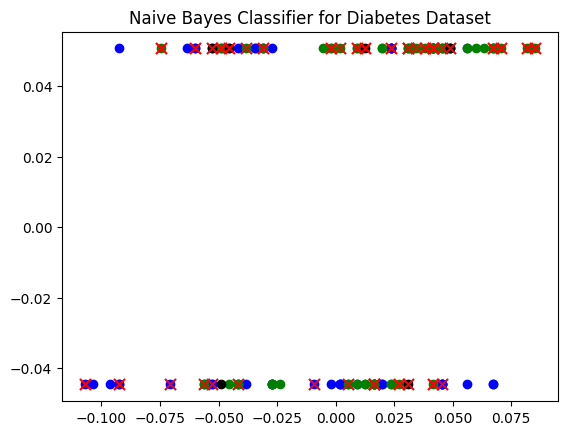

In [ ]:
colours = 'bgk'
for i, colour in enumerate(colours):
  train_data = X_train[Y_train == i]
  plt.scatter(train_data[:,0], train_data[:,1], marker='o', facecolors='none', edgecolors=colour)
  test_data = X_test[Y_pred == i]
  plt.scatter(test_data[:,0], test_data[:,1], marker='o', facecolors=colour, edgecolors=colour)

error_data = X_test[Y_pred != Y_test]
plt.scatter(error_data[:,0], error_data[:,1], marker='x', facecolors='r', edgecolors='r', s=64)

# ellipse = patches.Ellipse(xy=nb.theta_[0], width=nb.sigma_[0][0]*10, height=nb.sigma_[0][1]*10, edgecolor='b', fc='none')
# # ellipse = patches.Ellipse(xy=(5,2), width=2, height=1)
# ax = plt.gca()
# ax.add_patch(ellipse)

plt.title("Naive Bayes Classifier for Diabetes Dataset")
plt.show()

## Discussions
To find a solution to this problem, again, it was used the sklearn or scikit-learn package.

For this problem, we used the diabetes dataset (provided in sklearn), which contains 10 features and one quantitative measure of diabetes progression. The progression measure was also turned into three different classes: 0-150, 150-300, and 300+.

The following table presents us the results (an example) outputted by the program when using the naive Bayes model:

| accuracy | Confusion Matrix| Prior | Mean | Variance |
|:-----------|:--------|:--------|:--------|:--------|
|    0.6486     |    [ [ 36  23  1] [ 9  35  1] [ 0  5  1] ] | [0.5377 0.4380 0.0241] | [ [-0.0065 -0.0001 -0.0227 -0.0169 -0.0095 -0.0080 0.0180 -0.0209 -0.0265 -0.0139] [ 0.0072  0.0020  0.0189  0.0153  0.0061   0.0040 -0.0154   0.0147   0.0233  0.0138] [ 0.0022  0.0149  0.0705  0.0231  0.0121  0.0129 -0.0369  0.0555    0.0359  0.0595] ] ] | [ [0.0023 0.0022 0.0013 0.0016 0.0021 0.0020 0.0022 0.0014 0.0015 0.0015] [0.0022 0.0022 0.0019 0.0022 0.0022 0.0022 0.0014 0.0020 0.0018 0.0023  ] [0.0018 0.0021 0.0015 0.0022 0.0021 0.0016 0.0019 0.0041 0.0017 0.0014] ] |

###### table 3

By analysing the previous table, we can notice that the accuracy rate is lower compared to the previous task, which indicates that the values obtained are not as precise in terms of the level of prediction. Therefore, through the information provided by the table above we can infer that there were some efficiency problems when it comes to correctly predicting data.

In the following figure, we can see a plot relative to the example results displayed in the table above, where, just for the sake of simplicity and behaviour study, we only considered the first two features.

![Figure 5](https://github.com/LeomPina/AIreports/blob/main/t4.2_plot.png?raw=true)

Figure 5

By looking at the plot, we can see that there are many values marked with a red cross (misclassified pattern), which adds to the conclusion that the results for this task were not as predicatively correct as they were in the previous one.

## Task 4.3 Monty Hall Problem Using Bayesian Network
###Problem Description

This last task presents the famous "Monty Hall" problem, which is a probability puzzle named after the host of an American TV show, called Monty Hall. So this problem consists of having 3 distinct doors, in which behind 1 of them is a car (that represents the prize) and behind the other 2 are goats (which are worthless). As a contestant, we pick one of these 3 doors and then the host, who knows what's behind each door, will open one of the doors that contains a goat. After doing this, the host will ask us (the contestant) if we would like to switch to the other closed door or, instead, stick with our original choice.

Now, the real challenge is to know what is the best choice to make. The answer to this question is, yes, we should switch our choice to the other unopened door, as it's to our advantage to do so, since now our odds of winning have just doubled.

The following figure shows a representation of the problem.

![Figure 6](https://github.com/LeomPina/AIreports/blob/main/Captura%20de%20ecr%C3%A3%202023-10-17%20163610.png?raw=true)

Figure 6

This is a very popular brain teaser problem, more info about it can be found at https://en.wikipedia.org/wiki/Monty_Hall_problem.

In order to solve this problem, we are going to use Bayesian Networks. So first of all, we have to define the variables, P is going to symbolize the prize, and since we have 3 doors available where it could be, then P={0, 1, 2}. As for the contestant's initial door chosen, C, we also assume that C={0, 1, 2}. For the host's choice, H, which will totally depend on where the car is and also what was the contestant's initial choice, we can say that H={0, 1, 2}. When talking about prior probabilities (initial probability about an event before any other has happened), we can infer that P(P=0) = P(P=1) = P(P=2) = 1/3, P(C=0) = P(C=1) = P(C=2) = 1/3 and, since the host's decision relies on P and C, we will have the following structure.

![Figure 7](https://github.com/LeomPina/AIreports/blob/main/Captura%20de%20ecr%C3%A3%202023-10-17%20173152.png?raw=true)

Figure 7

The figure above represents our Bayesian Network.

Let's now take a look at the following table, which shows us the conditional probability (probability of an event happening, given that another one has already occurred) of H given P and C is:

![Figure 8](https://github.com/LeomPina/AIreports/blob/main/Captura%20de%20ecr%C3%A3%202023-10-17%20174245.png?raw=true)

Figure 8

##Implementation and results
This section shows the implemented code and its respective output.

In [ ]:
!pip install pgmpy
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.6 MB/s eta 0:00:00


In [ ]:
# Defining the network structure
model = BayesianModel([('Contestant', 'Host'), ('Prize', 'Host')])

# Defining the CPDs:
'''
cpd_c = TabularCPD('Contestant', 3, [[1/3], [1/3], [1/3]])
cpd_p = TabularCPD('Prize', 3, [[1/3], [1/3], [1/3]])
cpd_h = TabularCPD('Host', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5],
                               [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5],
                               [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['Contestant', 'Prize'], evidence_card=[3, 3])
'''

cpd_c = TabularCPD('Contestant', 4, [[0.25], [0.25], [0.25], [0.25]])
cpd_p = TabularCPD('Prize', 4, [[0.25], [0.25], [0.25], [0.25]])
cpd_h = TabularCPD('Host', 4, [[0,   0,    0,    0,    0,    1/3, 0.5,  0.5,  0,    0.5,  1/3, 0.5,  0,    0.5,  0.5,  1/3],
                                [1/3, 0,    0.5,  0.5,  0,    0,   0,    0,    0.5,  0,    1/3, 0.5,  0.5,  0,    0.5,  1/3],
                                [1/3, 0.5,  0,    0.5,  0.5,  1/3, 0,    0.5,  0,    0,    0,   0,    0.5,  0.5,  0,    1/3],
                                [1/3, 0.5,  0.5,  0,    0.5,  1/3, 0.5,  0,    0.5,  0.5,  1/3, 0,    0,    0,    0,    0]],
                   evidence=['Contestant', 'Prize'], evidence_card=[4, 4])

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)


In [ ]:
# Infering the posterior probability
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior = infer.query(variables=['Prize'], evidence={'Contestant': 0, 'Host': 2}, show_progress=False, joint=False)
print(posterior['Prize'])

+----------+--------------+
| Prize    |   phi(Prize) |
+==========+==============+
| Prize(0) |       0.2500 |
+----------+--------------+
| Prize(1) |       0.3750 |
+----------+--------------+
| Prize(2) |       0.0000 |
+----------+--------------+
| Prize(3) |       0.3750 |
+----------+--------------+


## Discussions
To solve this problem, we used the pgmpy library, which provides graphical models including the Bayesian networks. The online documentation can be found at https://pgmpy.org/.

This table presents us the results outputted by the algorithm when using the Bayesian Network:

| Prize | phi(Prize)|
|:-----------|:--------|
|    Prize(0)    |  0.3333  |
|    Prize(1)    |  0.6667  |
|    Prize(2)    |  0.0000  |

###### table 4

By analyzing the previous table and its results, we can notice that the decision to keep our original door choice has a prize probability of 1/3, on the other hand, switching to the other closed door gives us a prize probability of 3/2 (while obviously, the prize probability of the already revealed door is 0). Therefore, we can conclude that the best option is to switch our choice as our chances of winning are doubled.

Let's now study the results of a different scenario, where the rules of the game are changed and now we have 4 doors, while the other rules stay the same since we still choose one door and the host still opens one door that doesn't contain the prize.

This next table presents us the results outputted by this new algorithm submitted to the changes mentioned before when using the Bayesian Network:

| Prize | phi(Prize)|
|:-----------|:--------|
|    Prize(0)    |  0.2500  |
|    Prize(1)    |  0.3750  |
|    Prize(2)    |  0.0000  |
|    Prize(3)    |  0.3750  |

###### table 5

By analysing the table above, we can see that the probabilities have changed a lot. Initially, the probability of choosing the prize is 1/4, as the host reveals one of the doors with a goat, the prize probability of that door will obviously, instantly become 0. Furthermore, as the prize probability is 1/4 and one goat was revealed, this leaves us with 3/4 of the prize probability that is distributed for the two remaining doors, which gives us a 3/8 of the prize probability for these two other unopened doors. Therefore, we can conclude that in this scenario, it's also in our interest to switch our choice to one of these two doors, since we have a higher chance of winning the prize.

#Conclusion

In conclusion, after completing this Lab work by solving its tasks and problems, we can agree that by using the Naïve Bayes and Bayesian Networks, we were able to find a solution for these 3 tasks. By doing so, we also studied these 3 classic problems and therefore gained additional knowledge on how these tools and methods can help us to predict data and work on probabilistic
inference.

In further investigations, we could use and explore nonlinear methods, create more complex Bayesian Networks, compare the performance of Naïve Bayes with other machine learning algorithms, change the training and testing set to get different results, and explore other scenarios. Furthermore, we could also try to apply this knowledge to real-world applications or other areas of investigation.